# Analysis of Multi-Periodized Training Regimen
Date: 2019-06-24  
Author: Jason Beach 
Categories: DataScience, Fitness  
Tags: R, tag2, tag3  
<!--eofm-->

Intro goes here.  Daily Strength app created by [Anthony Ng](https://github.com/nganthony).

## Config

We will be using python, with R for visualizations and other specific functions, as our main workflow.  We will also use the python-javascript autotranslation in order to convert JS integers into string-formatted dates.

In [2]:
# basics
import numpy as np
import pandas as pd
from pandas import Timestamp
#from sklearn import metrics
#from sklearn import linear_model
import pickle

np.__version__, pd.__version__

('1.17.2', '0.25.1')

In [2]:
#! conda install -yc r rpy2

In [3]:
#! conda install -y tzlocal

In [3]:
%load_ext rpy2.ipython

df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

In [4]:
%%R
options(warn=-1)   # do not show warnings: for presentation only

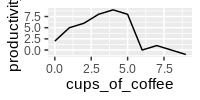

In [6]:
%%R -i df -w 2 -h 1 --units in -r 100 
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
pd.options.display.float_format = '{:20,.2f}'.format    # format decimal output 
pd.options.display.max_columns = None                   # show all columns in table
pd.options.mode.chained_assignment = None               # default='warn', turn-off this warning

## ETL

### Recent data using Daily Strength application

In [83]:
path = './Data/daily_strength_2019_12_21/'
file = 'data.csv'
data = pd.read_csv(path+file)

In [10]:
data.rename(columns={'workoutSessionExercises.exercise.name': 'Exercise'}, inplace=True)

In [11]:
df = data[['start', 'end', 'set', 'weight', 'reps', 'Exercise']]

In [12]:
df.start = pd.to_datetime(df.start, infer_datetime_format=True)
df.end = pd.to_datetime(df.end, infer_datetime_format=True)
df['Date'] = df.start
df['Day'] = df.Date.dt.date

In [13]:
df['Exercise'] = df['Exercise'].replace({'Cable Underhand Pulldown':'Pull Ups'})
df['Exercise'] = df['Exercise'].replace({'Barbell Squat To Bench':'Barbell Squat'})
df['Exercise'] = df['Exercise'].replace({'T-Bar Rows':'Bent Over Barbell Row'})

In [14]:
df['Workout'] = '5x5'
df.loc[df.reps <= 1,'Workout'] = '1rep'

In [15]:
(df.groupby('Exercise').count())['Date']

Exercise
Barbell Bench Press                762
Barbell Deadlifts                  611
Barbell Squat                      422
Bent Over Barbell Row              469
Clean                               26
Decline Barbell Bench Press         67
Pull Ups                           846
Standing Barbell Military Press    439
Name: Date, dtype: int64

In [19]:
df[['Exercise','weight','reps','set','Day','Workout']].head()

,Exercise,weight,reps,set,Day,Workout
0,Barbell Bench Press,275.00,3,1,2018-12-01,5x5
1,Barbell Bench Press,275.00,3,2,2018-12-01,5x5
2,Barbell Bench Press,275.00,2,3,2018-12-01,5x5
3,Barbell Bench Press,275.00,2,4,2018-12-01,5x5
4,Barbell Bench Press,275.00,2,5,2018-12-01,5x5


In [173]:
df.dtypes
df.Day = df.Day.astype(str)

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



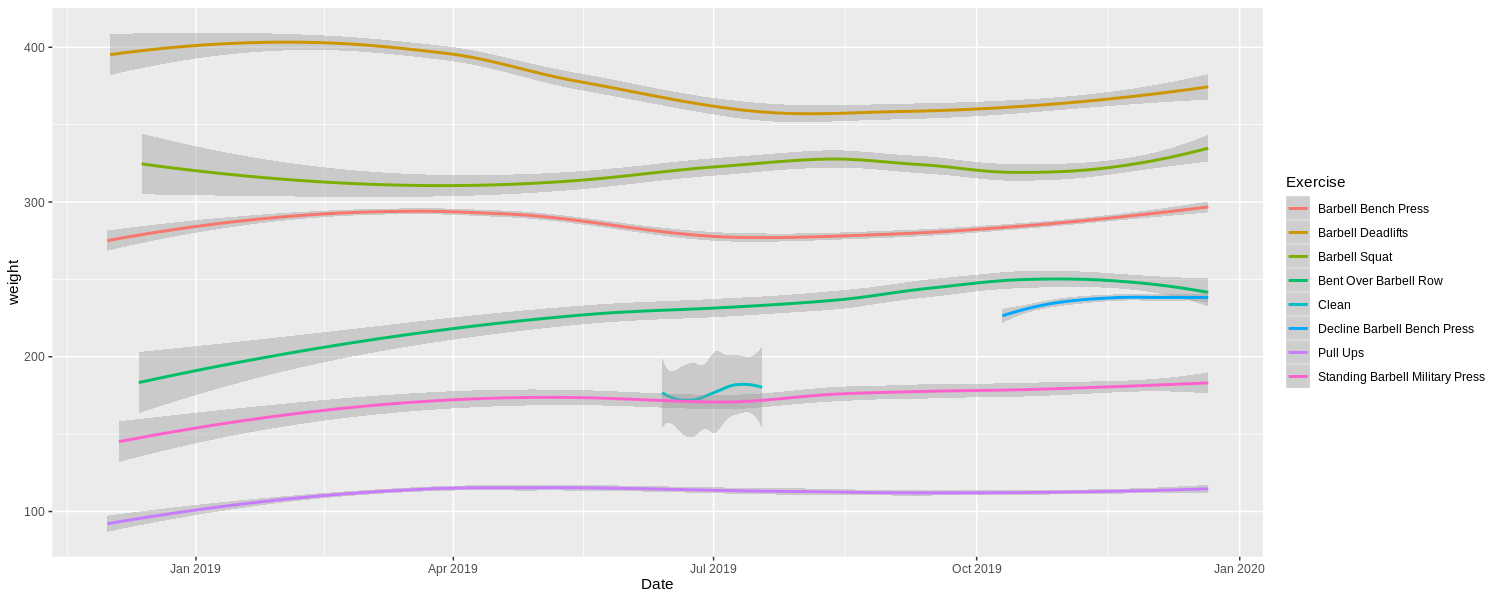

In [176]:
%%R -i df -w 15 -h 6 --units in -r 100 
df <- df 
df$Date <- as.Date(df$Day)

library(ggplot2)
ggplot(df, aes(x=Date, y=weight, col=Exercise)) + geom_smooth()

### Archived data logged to Excel

In [120]:
path = './Data/daily_strength_2019_12_21/'
file = 'Health & Physical Fitness-Combined_Results.csv'
data_archive = pd.read_csv(path+file)
""", 
                           dtype={'Phase':'object', 
                                  'Exercise':'object', 
                                  'Weight':np.float64, 
                                  'Reps':np.float64,
                                  'Set':np.float64,
                                  'Day':np.datetime64,
                                  'Workout':'object',
                                  'Notes':'object'})
"""
data_archive.shape

(2886, 8)

In [121]:
data_archive.dtypes

Phase       object
Exercise    object
Weight      object
Reps        object
Set         object
Date        object
Workout     object
Notes       object
dtype: object

In [122]:
data_archive.dropna(subset=['Date','Weight','Reps'], inplace=True)
data_archive.rename(columns={'Weight':'weight', 'Reps':'reps', 'Set':'set', 'Date':'Day'}, inplace=True)
#w['female'] = w['female'].map({'female': 1, 'male': 0})
data_archive.shape

(1780, 8)

In [123]:
dfArchive = data_archive
dfArchive.head()

,Phase,Exercise,weight,reps,set,Day,Workout,Notes
0,Archive I,Pectoralis,47,8,NaN,1/23/2006,C,NaN
3,Archive I,Pectoralis,47,15,NaN,2/2/2006,C,NaN
4,Archive I,Pectoralis,12,10,NaN,2/6/2006,B,NaN
6,Archive I,Pectoralis,20,12,NaN,2/12/2006,B,"Isolate; treat like delt-rear, use side cable"
7,Archive I,Pectoralis,42,14,NaN,2/15/2006,C,Only short movement across body


In [124]:
(dfArchive.groupby('Exercise').count())['Day']

Exercise
Abs                          215
Back, Hamstring (Lift)        12
Biceps                       152
Deadlift                      66
Deltoid                       22
Deltoid-Front                131
Deltoid-Rear                 145
Deltoid-Side                 109
Dips                          15
Gastrocnemius / Ham minor      6
Glut, Quad (Press)            19
Hamstring                     42
Hamstring Major               27
Hamstring Minor               11
Illiopsoas                     8
Illiopsoas / Glut (Squat)     41
Latsius                      220
Latsius / Traps               73
Lower Back                    16
Neck Extensions               17
Pectoralis                   135
Press                         65
Pullups                       11
Quadriceps                     6
Quadriceps / Gluteus          61
Triceps                      155
Name: Day, dtype: int64

In [158]:
tmp = dfArchive

In [159]:
tmp.columns

Index(['Phase', 'Exercise', 'weight', 'reps', 'set', 'Day', 'Workout',
       'Notes'],
      dtype='object')

In [161]:
tmp.weight = tmp.weight.apply(pd.to_numeric, errors='coerce').dropna().astype(np.float64)
tmp.reps = tmp.reps.apply(pd.to_numeric, errors='coerce').dropna().astype(np.float64)
tmp.set = tmp.set.apply(pd.to_numeric, errors='coerce').dropna().astype(np.float64)

In [162]:
tmp.Day = tmp.Day.apply(pd.to_datetime, errors='coerce').dropna().astype(np.datetime64)

In [163]:
tmp.Day = tmp.Day.dt.date
tmp.Day = tmp.Day.astype(str)
tmp.head()
tmp.dtypes
tmp = tmp[['weight', 'Day', 'Exercise']]

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



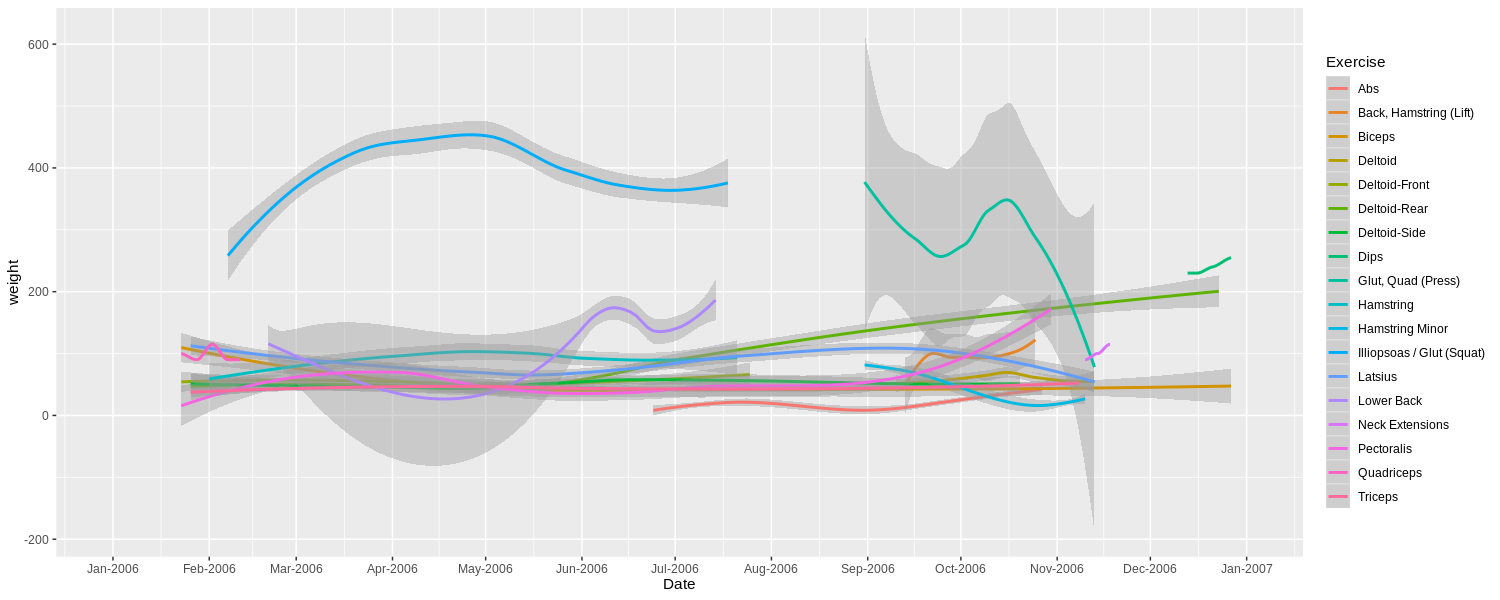

In [177]:
%%R -i tmp -w 15 -h 6 --units in -r 100 
df <- tmp 
df$Date <- as.Date(df$Day)

library(ggplot2)
library(scales)
ggplot(df, aes(x=Date, y=weight, col=Exercise)) + 
    geom_smooth() +
    scale_x_date(date_breaks = "1 month", 
                 labels=date_format("%b-%Y"),
                 limits = as.Date(c('2006-01-01','2007-01-01')))

## Exploratory Data Analysis

### Individual Exercises

#### Bench

In [50]:
bench = df.loc[df.Exercise == 'Barbell Bench Press']

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



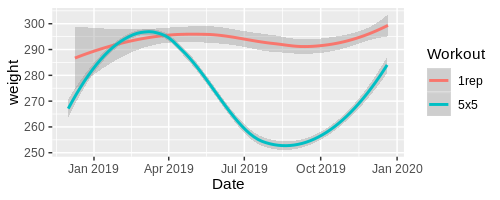

In [52]:
%%R -i bench -w 5 -h 2 --units in -r 100 
df <- bench 
df$Date <- as.Date(df$Date)

library(ggplot2)
ggplot(df, aes(x=Date, y=weight, col=Workout)) + geom_smooth()

#### Military press

In [53]:
press = df.loc[df.Exercise == 'Standing Barbell Military Press']

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



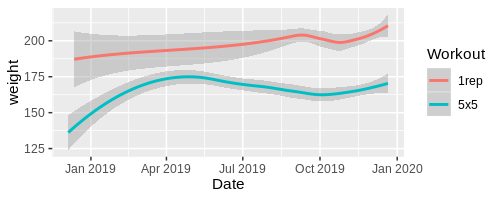

In [56]:
%%R -i press -w 5 -h 2 --units in -r 100 
df = press
df$Date <- as.Date(df$Date)

library(ggplot2)
ggplot(df, aes(x=Date, y=weight, col=Workout)) + geom_smooth()

#### Deadlifts

In [57]:
deadlift = df.loc[df.Exercise == 'Barbell Deadlifts']

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



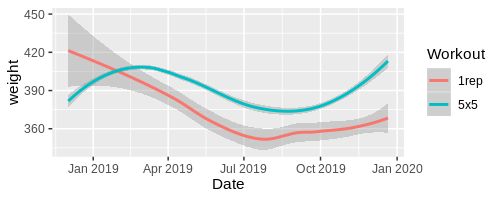

In [59]:
%%R -i deadlift -w 5 -h 2 --units in -r 100 
df = deadlift
df$Date <- as.Date(df$Date)

library(ggplot2)
ggplot(df, aes(x=Date, y=weight, col=Workout)) + geom_smooth()

#### Squat

In [64]:
squat = df.loc[df.Exercise == 'Barbell Squat']

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



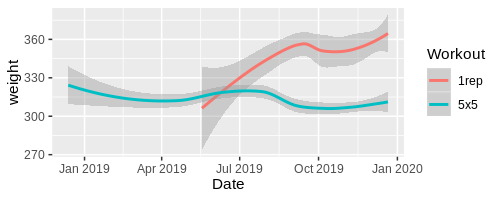

In [65]:
%%R -i squat -w 5 -h 2 --units in -r 100 
df = squat
df$Date <- as.Date(df$Date)

library(ggplot2)
ggplot(df, aes(x=Date, y=weight, col=Workout)) + geom_smooth()

## Day-level Analysis

### Transforms

In [371]:
#1rep
df1 = df.loc[df.Workout=='1rep']
df1Day = df1.groupby(['Day','Exercise']).agg({'weight':['count', 'max']})
df1Day = pd.DataFrame(df1Day)

df1Day.reset_index(col_level=1, inplace=True)
df1Day.columns = df1Day.columns.droplevel()
df1Day['Workout'] = '1rep'
df1Day.rename(columns={'max':'weight'}, inplace=True)

#5x5
df5 = df.loc[df.Workout=='5x5']
df5Day = df5.groupby(['Day','Exercise']).agg({'weight':['count', 'mean']})
df5Day = pd.DataFrame(df5Day)
df5Day.reset_index(col_level=1, inplace=True)
df5Day.columns = df5Day.columns.droplevel()
df5Day['Workout'] = '5x5'
df5Day.rename(columns={'mean':'weight'}, inplace=True)

In [372]:
dfDay = pd.concat([df1Day, df5Day], axis=0)

In [424]:
path = './Data/daily_strength_2019_12_21/'
file = 'data_Day.csv'
dfDay.to_csv(path+file)

#### Conditions

In [11]:
path = './Data/daily_strength_2019_12_21/'
file = 'data_DayWithPhase.csv'
dfDay = pd.read_csv(path+file)
dfDay.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
dfDay

,Day,Exercise,count,weight,Workout,Phase
0,2018-12-01,Pull Ups,3,90.00,1rep,Strength
1,2018-12-01,Barbell Bench Press,5,275.00,5x5,Strength
2,2018-12-01,Pull Ups,2,90.00,5x5,Strength
3,2018-12-02,Barbell Deadlifts,1,385.00,1rep,Strength
4,2018-12-02,Barbell Deadlifts,4,385.00,5x5,Strength
...,...,...,...,...,...,...
1191,2019-12-21,Barbell Deadlifts,1,405.00,5x5,Strength
1192,2019-12-21,Barbell Squat,4,310.00,5x5,Strength
1193,2019-12-21,Bent Over Barbell Row,4,212.50,5x5,Strength
1194,2019-12-21,Decline Barbell Bench Press,3,238.33,5x5,Strength


In [ ]:
#phase(begin,end)
phase_skill = [('2019-04-27','2019-05-09'),('2019-11-14','2019-11-20'),('2019-12-15','2019-12-21')]

In [ ]:
#ggplot2 polygon (for each plot)

In [400]:
#conditions
dfDay0 = dfDay.drop(dfDay[(dfDay.Workout == '1rep') & (dfDay['count'] == 1)].index)

### EDA

In [426]:
dfDayR = dfDay0
dfDayR['Day'] = dfDayR.Day.astype(str)

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



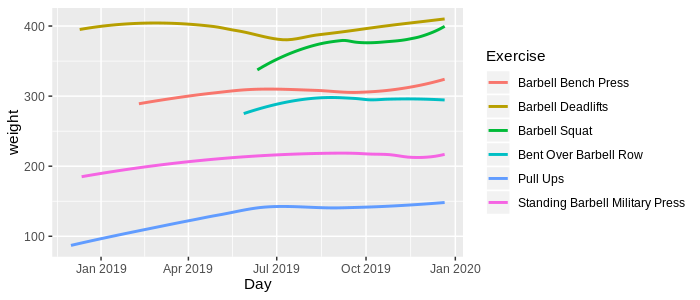

In [428]:
%%R -i dfDayR -w 7 -h 3 --units in -r 100 

dfDayR$Day <- as.Date(dfDayR$Day)
tmp <- dfDayR[dfDayR$Workout=='1rep',]

library(ggplot2)
ggplot(tmp, aes(x=Day, y=weight, col=Exercise)) + geom_smooth(se=FALSE)

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



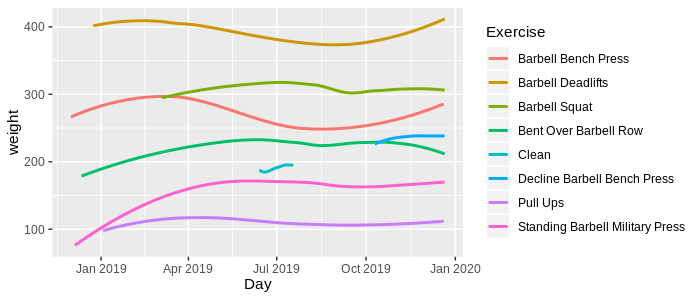

In [429]:
%%R -i dfDayR -w 7 -h 3 --units in -r 100 

dfDayR$Day <- as.Date(dfDayR$Day)
tmp <- dfDayR[dfDayR$Workout=='5x5',]

library(ggplot2)
ggplot(tmp, aes(x=Day, y=weight, col=Exercise)) + geom_smooth(se=FALSE)

### Individual exercises

#### Bench press

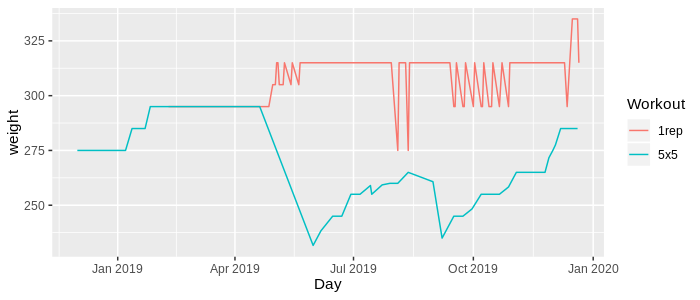

In [403]:
%%R -i dfDayR -w 7 -h 3 --units in -r 100 

dfDayR$Day <- as.Date(dfDayR$Day)
tmp <- dfDayR[dfDayR$Exercise == 'Barbell Bench Press',]

library(ggplot2)
library(zoo)
ggplot(tmp, aes(x=Day, y=weight, col=Workout)) +
    geom_line()
    #geom_smooth(n=20)
    #geom_smooth(span=.1, se=FALSE)
    #geom_line(aes(y=rollmean(weight, 10, na.pad=TRUE)))

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



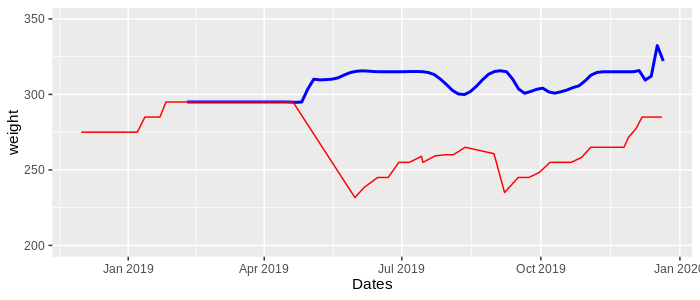

In [416]:
%%R -i dfDayR -w 7 -h 3 --units in -r 100 

dfDayR$Day <- as.Date(dfDayR$Day)
tmp <- dfDayR[dfDayR$Exercise == 'Barbell Bench Press',]

library(ggplot2)
library(zoo)

p = ggplot() + 
    geom_smooth(data = tmp[tmp$Workout=='1rep',], aes(x = Day, y = weight), color = "blue",     span=.1, se=FALSE) +
    geom_line(data = tmp[tmp$Workout=='5x5',], aes(x = Day, y = weight), color = "red") +
    xlab('Dates') + 
    ylab('weight') +
    ylim(200,350)

print(p)

In [382]:
#Query data
#why is the variability in 'weight_1rep'?
# -it is calculated as max() over day
# -it includes warmup sets during weight_5x5 training
dfDayR.loc[(dfDayR.Exercise == 'Barbell Bench Press') & (dfDayR.Workout == '1rep') & (dfDayR.Day > '2019-07-01')]

,Day,Exercise,count,weight,Workout
230,2019-07-07,Barbell Bench Press,3,315.00,1rep
237,2019-07-14,Barbell Bench Press,1,265.00,1rep
241,2019-07-16,Barbell Bench Press,3,315.00,1rep
249,2019-07-24,Barbell Bench Press,3,315.00,1rep
254,2019-07-29,Barbell Bench Press,1,265.00,1rep
...,...,...,...,...,...
514,2019-12-16,Barbell Bench Press,6,335.00,1rep
520,2019-12-17,Barbell Bench Press,9,335.00,1rep
526,2019-12-18,Barbell Bench Press,7,335.00,1rep
532,2019-12-20,Barbell Bench Press,5,335.00,1rep
